Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import re
import os
import librosa.display
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Функция отрисовки графиков аудио
def wave(path, e):
    filepath = path
    # Загрузка аудио 
    y, sr = librosa.load(filepath, duration=3)
     # Создание графика волн
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {}'.format(e), size=15)
    librosa.display.waveshow(y, sr=sr)
    plt.show()

def spectrogram(path, e):
    filepath = path
    # Загрузка аудио 
    y, sr = librosa.load(filepath, duration=3)
    # функция stft преобразует данные по  преобразованию Фурье
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()
    
# Функция для извлечения признаков аудио
def extract_mfcc(file_path, n_mfcc=20):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)

In [3]:
# Определение пути к файлам
data_path = "/Users/apple/Downloads/TESS"
dirs = os.listdir(data_path)

X = []
labels = []

# Извлечение эмоции из имени файла и  mfcc из аудио
for d in dirs:
    if os.path.isdir(data_path +"/"+ d):
        for file in os.listdir(data_path +"/"+ d):
            if 'wav' in file:
                file_path = data_path + '/' + d + '/' + file
                mfcc = extract_mfcc(file_path)
                emotion = file.split('_')[-1].split('.')[0]
                X.append(mfcc)
                labels.append(emotion)


X = np.array(X)
y = np.array(labels)

# Кодирование меток
le = LabelEncoder()
y = le.fit_transform(y)

# Pазделение на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

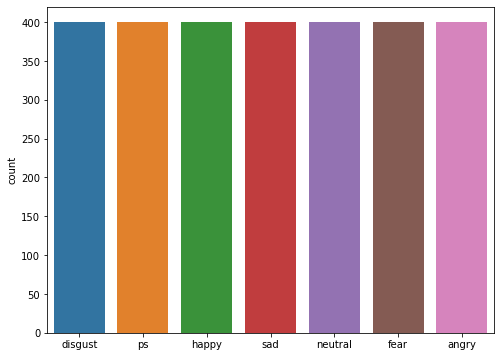

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(labels)
plt.show()

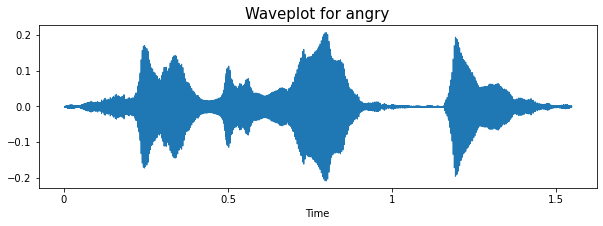

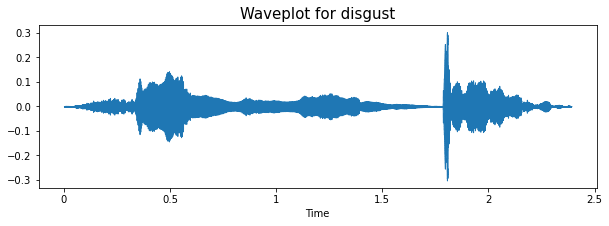

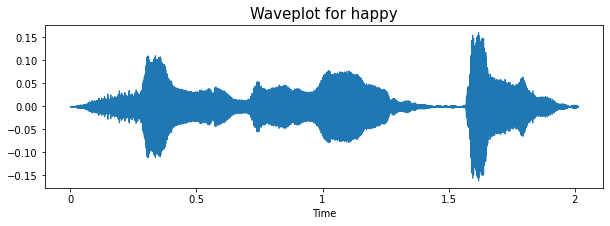

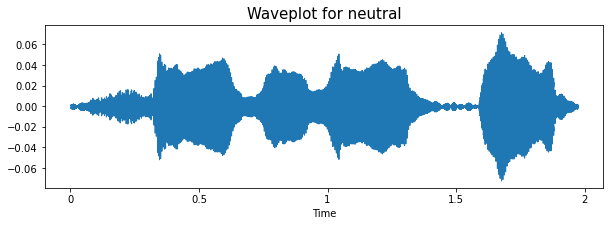

In [22]:
wave('/Users/apple/Downloads/TESS/OAF_angry/OAF_beg_angry.wav','angry')
wave('/Users/apple/Downloads/TESS/OAF_disgust/OAF_beg_disgust.wav','disgust')
wave('/Users/apple/Downloads/TESS/OAF_happy/OAF_beg_happy.wav','happy')
wave('/Users/apple/Downloads/TESS/OAF_neutral/OAF_beg_neutral.wav','neutral')

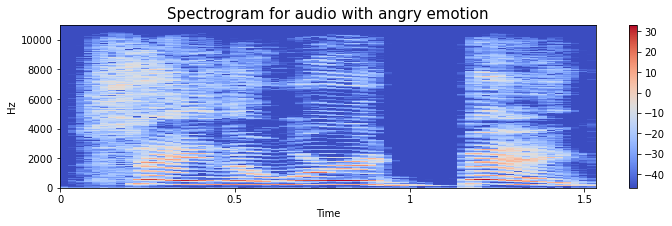

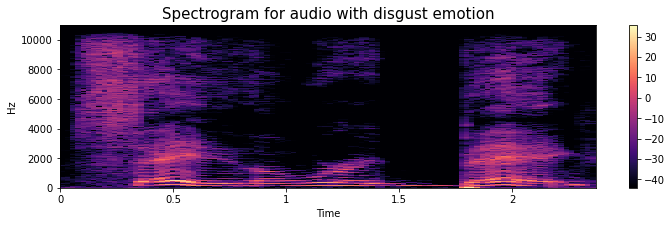

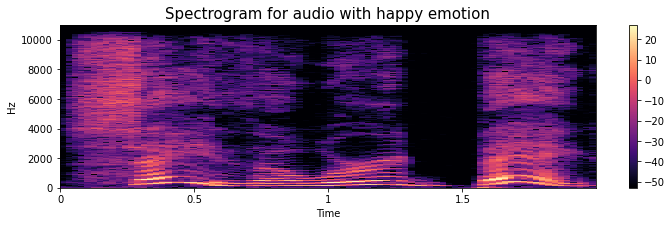

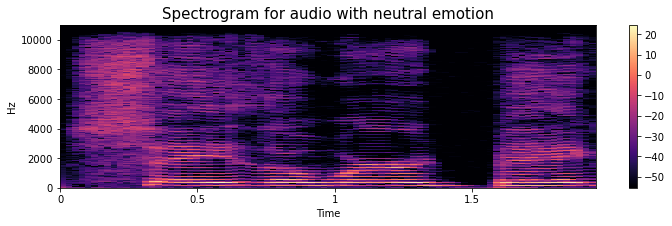

In [23]:
spectrogram('/Users/apple/Downloads/TESS/OAF_angry/OAF_beg_angry.wav','angry')
spectrogram('/Users/apple/Downloads/TESS/OAF_disgust/OAF_beg_disgust.wav','disgust')
spectrogram('/Users/apple/Downloads/TESS/OAF_happy/OAF_beg_happy.wav','happy')
spectrogram('/Users/apple/Downloads/TESS/OAF_neutral/OAF_beg_neutral.wav','neutral')

# Модели 

In [74]:
acurracy = []
name = []

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
acurracy.append(test_accuracy)
name.append(str(rf))

print("Показатели тестовой модели")
print("Точность предсказания:", test_accuracy)

Показатели тестовой модели
Точность предсказания: 0.975


In [76]:
from sklearn.neighbors import KNeighborsClassifier

cls =KNeighborsClassifier(n_neighbors = 5)
cls.fit(X_train, y_train)

y_pred = cls.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
acurracy.append(test_accuracy)
name.append(str(cls))

print("Показатели тестовой модели")
print("Точность предсказания:", test_accuracy)


Показатели тестовой модели
Точность предсказания: 0.9482142857142857


In [77]:
from sklearn.svm import SVC 
cls =SVC(kernel="rbf")
cls.fit(X_train, y_train)

y_pred = cls.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
acurracy.append(test_accuracy)
name.append(str(cls))


print("Показатели тестовой модели")
print("Точность предсказания:", test_accuracy)

Показатели тестовой модели
Точность предсказания: 0.6892857142857143


In [78]:
cls =SVC(kernel='poly', C = 10)

cls.fit(X_train, y_train)

y_pred = cls.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
acurracy.append(test_accuracy)
name.append(str(cls))


print("Показатели тестовой модели")
print("Точность предсказания:", test_accuracy)
#print(classification_report(y_test,y_pred))

Показатели тестовой модели
Точность предсказания: 0.9214285714285714


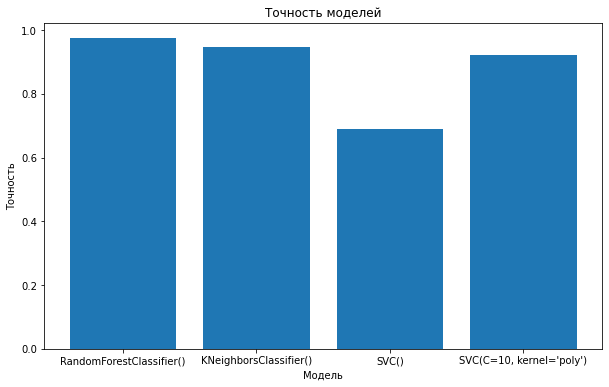

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(name, acurracy)

# Настройка графика
plt.title('Точность моделей')
plt.xlabel('Модель')
plt.ylabel('Точность')

# Отображение графика
plt.show()

# CNN

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

In [12]:
# Определение класса AudioDataset
class AudioDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Определение модели
class EmotionRecognizer(nn.Module):
    def __init__(self, num_classes):
        super(EmotionRecognizer, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(1, 3), padding=(0, 1))
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=(1, 2))
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(1, 3), padding=(0, 1))
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(1, 2))
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=(1, 3), padding=(0, 1))
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=(1, 2))
        
        self.fc1 = nn.Linear(128 * 1 * 2, 128)
        self.relu4 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(128, 64)
        self.relu5 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.relu5(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        
        return x

# Функция для обучения модели
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    return running_loss / len(dataloader),accuracy

# Функция для валидации модели
def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    return running_loss / len(dataloader), accuracy


In [26]:
# Создание наборов данных
train_dataset = AudioDataset(X_train, y_train)
test_dataset = AudioDataset(X_test, y_test)

# Создание загрузчиков данных
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Создание модели
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes  = len(np.unique(y))
model = EmotionRecognizer(num_classes).to(device)
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001)

num_epochs = 40
val_l = []
train_l = []
val_a = []
train_a = []
# Обучение и валидация модели
for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = validate_epoch(model, test_loader, criterion, device)
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    val_l.append(val_loss)
    train_l.append(train_loss)
    val_a.append(val_accuracy)
    train_a.append(train_accuracy)
    

Epoch 1/40, Train Loss: 1.8912, Val Loss: 1.8157, Val Accuracy: 0.4804
Epoch 2/40, Train Loss: 1.7370, Val Loss: 1.5893, Val Accuracy: 0.4946
Epoch 3/40, Train Loss: 1.5454, Val Loss: 1.3621, Val Accuracy: 0.5982
Epoch 4/40, Train Loss: 1.3537, Val Loss: 1.1303, Val Accuracy: 0.7054
Epoch 5/40, Train Loss: 1.1795, Val Loss: 0.9276, Val Accuracy: 0.7982
Epoch 6/40, Train Loss: 1.0142, Val Loss: 0.7462, Val Accuracy: 0.8643
Epoch 7/40, Train Loss: 0.8887, Val Loss: 0.6188, Val Accuracy: 0.8946
Epoch 8/40, Train Loss: 0.7635, Val Loss: 0.4943, Val Accuracy: 0.8946
Epoch 9/40, Train Loss: 0.6708, Val Loss: 0.3903, Val Accuracy: 0.9286
Epoch 10/40, Train Loss: 0.5811, Val Loss: 0.3198, Val Accuracy: 0.9429
Epoch 11/40, Train Loss: 0.5171, Val Loss: 0.2762, Val Accuracy: 0.9482
Epoch 12/40, Train Loss: 0.4383, Val Loss: 0.2261, Val Accuracy: 0.9482
Epoch 13/40, Train Loss: 0.4190, Val Loss: 0.2015, Val Accuracy: 0.9571
Epoch 14/40, Train Loss: 0.3826, Val Loss: 0.1818, Val Accuracy: 0.9679
E

<ipython-input-38-e9c32332552b>:4: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  plt.fill_between(range(num_epochs), val_l, train_l, where=(train_l > val_l), color='C1', alpha=0.3, interpolate=True)


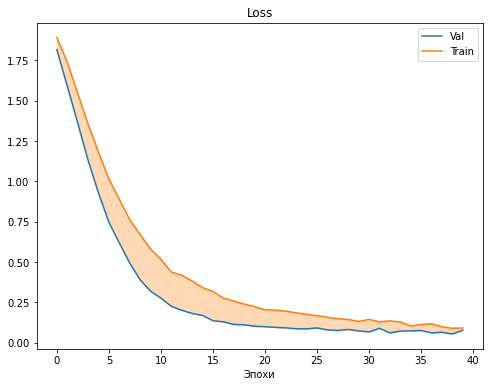

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(range(num_epochs),val_l, label = 'Val')
plt.plot(range(num_epochs),train_l, label = 'Train')
plt.fill_between(range(num_epochs), val_l, train_l, where=(train_l > val_l), color='C1', alpha=0.3, interpolate=True)
plt.title('Loss')
plt.xlabel('Эпохи')
plt.legend()
plt.show()

<ipython-input-39-0178768b5dfd>:4: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  plt.fill_between(range(num_epochs), val_a, train_a, where=(val_a > train_a), color='C0', alpha=0.3, interpolate=True)
<ipython-input-39-0178768b5dfd>:5: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  plt.fill_between(range(num_epochs), val_a, train_a, where=(val_a < train_a), color='C1', alpha=0.3, interpolate=True)


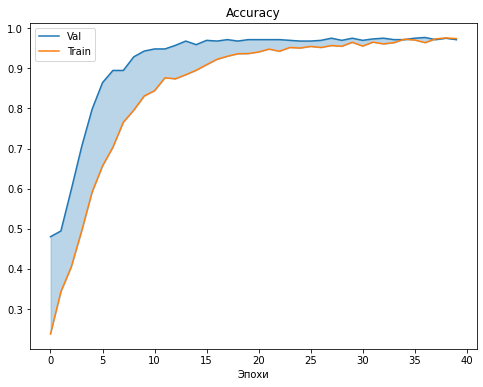

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(range(num_epochs),val_a, label = 'Val')
plt.plot(range(num_epochs),train_a, label = 'Train')
plt.fill_between(range(num_epochs), val_a, train_a, where=(val_a > train_a), color='C0', alpha=0.3, interpolate=True)
plt.fill_between(range(num_epochs), val_a, train_a, where=(val_a < train_a), color='C1', alpha=0.3, interpolate=True)
plt.title('Accuracy')
plt.xlabel('Эпохи')
plt.legend()
plt.show()

In [89]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 880.2 kB/s eta 0:00:00 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=fb3bcee6e663d1f055d8a75193f066d59114a6957307bf4d9d6812217bd2835c
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [11]:
# Визуализация работы неронной сети
from torchviz import make_dot
x = torch.from_numpy(X_test[1]).unsqueeze(0).unsqueeze(0) 
output = model(x)
make_dot(output, params=dict(model.named_parameters())).render("model_graph", format="png")

'model_graph.png'